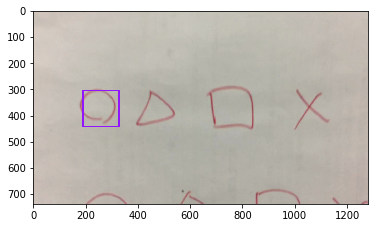

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

tar = 'datasets/tegaki/maru/maru_1_00057.png'
im = cv2.imread(tar)
cascade = cv2.CascadeClassifier('TrainingAssistant/results/cascades/tegaki_maru2/cascade.xml') #分類器の指定
circles= cascade.detectMultiScale(im, 1.1, 3) #物体の検出

for (x, y, w, h) in circles:
    upper_left = (x, y)
    bottom_right = (x+w, y+h)
    cv2.rectangle(im, upper_left, bottom_right, (255, 20, 147), thickness=3) #円の描画

# BGRからRGBに変換して画像読込み
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# BGRからRGBに変換して画像読込み
plt.imshow(im)
plt.show()

# cv2.imwrite('result.jpg', im)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 取得する色の範囲を指定する
lower_yellow = np.array([100,100,100])
upper_yellow = np.array([150,150,150])

cap = cv2.VideoCapture(0)
 
cascade = cv2.CascadeClassifier('TrainingAssistant/results/cascades/tegaki_maru2/cascade.xml') #分類器の指定

while(1):
    # フレームを取得
    ret, frame = cap.read()
 
    # フレームをHSVに変換
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
 
    circles= cascade.detectMultiScale(frame, 1.1, 3) #物体の検出

    for (x, y, w, h) in circles:
        upper_left = (x, y)
        bottom_right = (x+w, y+h)
        cv2.rectangle(frame, upper_left, bottom_right, (255, 20, 147), thickness=3) #円の描画
 
    cv2.imshow("display", frame)
 
    # qを押したら終了
    k = cv2.waitKey(1)
    if k == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()



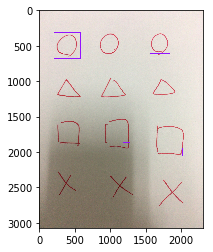

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

tar = 'datasets/tegaki/maru_test.jpg'
im = cv2.imread(tar)
cascade = cv2.CascadeClassifier('TrainingAssistant/results/cascades/tegaki_maru2/cascade.xml') #分類器の指定
circles= cascade.detectMultiScale(im, 1.1, 3) #物体の検出

for (x, y, w, h) in circles:
    upper_left = (x, y)
    bottom_right = (x+w, y+h)
    cv2.rectangle(im, upper_left, bottom_right, (255, 20, 147), thickness=3) #長方形の描画

# BGRからRGBに変換して画像読込み
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# 画像の表示
plt.imshow(im)
plt.show()

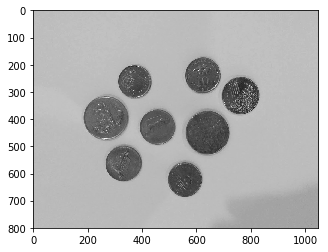

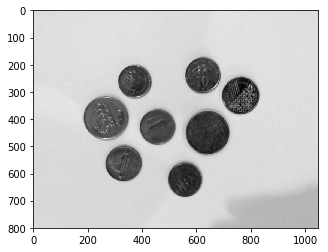

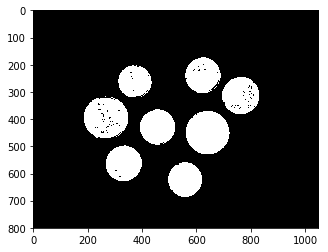

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

tar = 'datasets/tegaki/coins.jpg'
im = cv2.imread(tar)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

im_preprocessed = cv2.GaussianBlur(im_gray, (5, 5), 0)

_, im_binary = cv2.threshold(im_preprocessed, 130, 255, cv2.THRESH_BINARY)
im_binary = cv2.bitwise_not(im_binary)

# 画像の表示
plt.imshow(im_gray)
plt.gray()
plt.show()

plt.imshow(im_preprocessed)
plt.show()

plt.imshow(im_binary)
plt.show()

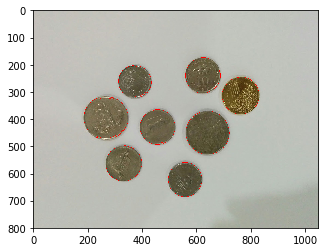

number of coins: 8


In [3]:
_, im_contours, _ = cv2.findContours(im_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
im_and_contours = np.copy(im)

min_im_area = 60
large_contours = [cnt for cnt in im_contours if cv2.contourArea(cnt) > min_im_area]
cv2.drawContours(im_and_contours, large_contours, -1, (0,0,255))

# 画像の表示
im_and_contours = cv2.cvtColor(im_and_contours, cv2.COLOR_BGR2RGB)

plt.imshow(im_and_contours)
plt.show()
    
coord = np.where(np.all(im_and_contours == (0, 0, 255), axis=-1))

for i in range(len(coord[0])):
    print("X:%s Y:%s"%(coord[1][i],coord[0][i]))
    
# print number of contours
print('number of coins: %d' % len(large_contours))

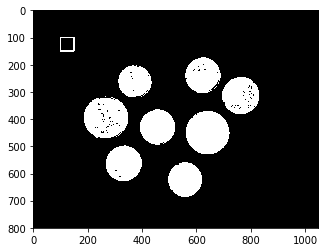

In [4]:
# BGRからRGBに変換して画像読込み
tar = 'datasets/tegaki/coins.jpg'
im = cv2.imread(tar)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

cv2.rectangle(im_binary, (100, 100), (150, 150), (255, 20, 147), thickness=3) #長方形の描画

# 画像の表示
plt.imshow(im_binary)
plt.show()

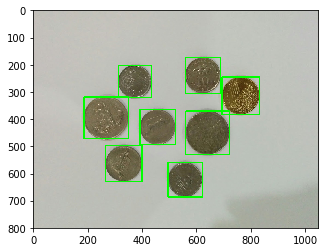

In [5]:
# create copy of image to draw bounding boxes
bounding_img = np.copy(im)
 
# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# 画像の表示
plt.imshow(bounding_img)
plt.show()

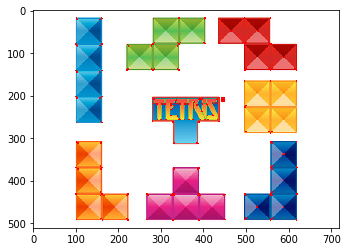

In [6]:
tar = 'datasets/tetris.jpg'
tetris = cv2.imread(tar)
tetris_gray = cv2.cvtColor(tetris, cv2.COLOR_BGR2GRAY)


dst = cv2.cornerHarris(tetris_gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
tetris[dst>0.01*dst.max()]=[0,0,255]

coord = np.where(np.all(tetris == (0, 0, 255), axis=-1))

# BGRからRGBに変換して画像読込み
tetris = cv2.cvtColor(tetris, cv2.COLOR_BGR2RGB)

plt.imshow(tetris)
plt.show()

In [7]:
for i in range(len(coord[0])):
    print("X:%s Y:%s"%(coord[1][i],coord[0][i]))

X:494 Y:16
X:495 Y:16
X:496 Y:16
X:101 Y:17
X:102 Y:17
X:103 Y:17
X:159 Y:17
X:160 Y:17
X:161 Y:17
X:339 Y:17
X:340 Y:17
X:341 Y:17
X:342 Y:17
X:343 Y:17
X:344 Y:17
X:402 Y:17
X:403 Y:17
X:404 Y:17
X:494 Y:17
X:495 Y:17
X:496 Y:17
X:555 Y:17
X:556 Y:17
X:557 Y:17
X:100 Y:18
X:101 Y:18
X:102 Y:18
X:103 Y:18
X:159 Y:18
X:160 Y:18
X:161 Y:18
X:162 Y:18
X:281 Y:18
X:282 Y:18
X:283 Y:18
X:339 Y:18
X:340 Y:18
X:341 Y:18
X:342 Y:18
X:343 Y:18
X:344 Y:18
X:401 Y:18
X:402 Y:18
X:403 Y:18
X:404 Y:18
X:433 Y:18
X:434 Y:18
X:435 Y:18
X:436 Y:18
X:492 Y:18
X:493 Y:18
X:494 Y:18
X:495 Y:18
X:496 Y:18
X:497 Y:18
X:498 Y:18
X:499 Y:18
X:554 Y:18
X:555 Y:18
X:556 Y:18
X:557 Y:18
X:100 Y:19
X:101 Y:19
X:102 Y:19
X:103 Y:19
X:159 Y:19
X:160 Y:19
X:161 Y:19
X:162 Y:19
X:281 Y:19
X:282 Y:19
X:283 Y:19
X:339 Y:19
X:340 Y:19
X:341 Y:19
X:342 Y:19
X:343 Y:19
X:344 Y:19
X:401 Y:19
X:402 Y:19
X:403 Y:19
X:404 Y:19
X:433 Y:19
X:434 Y:19
X:435 Y:19
X:436 Y:19
X:492 Y:19
X:493 Y:19
X:494 Y:19
X:495 Y:19
X:496 Y:19

X:558 Y:165
X:616 Y:165
X:617 Y:165
X:618 Y:165
X:495 Y:166
X:496 Y:166
X:497 Y:166
X:556 Y:166
X:557 Y:166
X:558 Y:166
X:616 Y:166
X:617 Y:166
X:618 Y:166
X:495 Y:167
X:496 Y:167
X:497 Y:167
X:556 Y:167
X:557 Y:167
X:558 Y:167
X:616 Y:167
X:617 Y:167
X:618 Y:167
X:556 Y:168
X:557 Y:168
X:558 Y:168
X:159 Y:201
X:160 Y:201
X:161 Y:201
X:162 Y:201
X:99 Y:202
X:100 Y:202
X:101 Y:202
X:102 Y:202
X:103 Y:202
X:159 Y:202
X:160 Y:202
X:161 Y:202
X:162 Y:202
X:163 Y:202
X:99 Y:203
X:100 Y:203
X:101 Y:203
X:102 Y:203
X:103 Y:203
X:159 Y:203
X:160 Y:203
X:161 Y:203
X:162 Y:203
X:163 Y:203
X:279 Y:203
X:280 Y:203
X:281 Y:203
X:435 Y:203
X:436 Y:203
X:437 Y:203
X:99 Y:204
X:100 Y:204
X:101 Y:204
X:102 Y:204
X:103 Y:204
X:159 Y:204
X:160 Y:204
X:161 Y:204
X:162 Y:204
X:163 Y:204
X:279 Y:204
X:280 Y:204
X:281 Y:204
X:435 Y:204
X:436 Y:204
X:437 Y:204
X:102 Y:205
X:103 Y:205
X:104 Y:205
X:105 Y:205
X:155 Y:205
X:156 Y:205
X:157 Y:205
X:158 Y:205
X:279 Y:205
X:280 Y:205
X:281 Y:205
X:435 Y:205
X:436 Y

X:560 Y:433
X:561 Y:433
X:562 Y:433
X:157 Y:434
X:158 Y:434
X:159 Y:434
X:165 Y:434
X:166 Y:434
X:167 Y:434
X:168 Y:434
X:219 Y:434
X:220 Y:434
X:221 Y:434
X:222 Y:434
X:267 Y:434
X:268 Y:434
X:269 Y:434
X:270 Y:434
X:271 Y:434
X:322 Y:434
X:323 Y:434
X:324 Y:434
X:325 Y:434
X:326 Y:434
X:327 Y:434
X:328 Y:434
X:329 Y:434
X:330 Y:434
X:331 Y:434
X:332 Y:434
X:333 Y:434
X:384 Y:434
X:385 Y:434
X:386 Y:434
X:387 Y:434
X:388 Y:434
X:389 Y:434
X:390 Y:434
X:391 Y:434
X:392 Y:434
X:393 Y:434
X:394 Y:434
X:445 Y:434
X:446 Y:434
X:447 Y:434
X:448 Y:434
X:449 Y:434
X:497 Y:434
X:498 Y:434
X:499 Y:434
X:500 Y:434
X:556 Y:434
X:557 Y:434
X:558 Y:434
X:559 Y:434
X:560 Y:434
X:561 Y:434
X:562 Y:434
X:157 Y:435
X:158 Y:435
X:159 Y:435
X:165 Y:435
X:166 Y:435
X:167 Y:435
X:168 Y:435
X:219 Y:435
X:220 Y:435
X:221 Y:435
X:222 Y:435
X:267 Y:435
X:268 Y:435
X:269 Y:435
X:270 Y:435
X:271 Y:435
X:322 Y:435
X:323 Y:435
X:324 Y:435
X:325 Y:435
X:326 Y:435
X:329 Y:435
X:330 Y:435
X:331 Y:435
X:332 Y:435
X:33

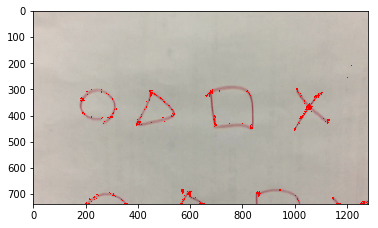

X:1134 Y:0
X:1135 Y:0
X:1136 Y:0
X:1137 Y:0
X:1138 Y:0
X:1157 Y:0
X:1158 Y:0
X:1159 Y:0
X:1160 Y:0
X:1161 Y:0
X:1134 Y:1
X:1135 Y:1
X:1136 Y:1
X:1137 Y:1
X:1138 Y:1
X:1157 Y:1
X:1158 Y:1
X:1159 Y:1
X:1160 Y:1
X:1161 Y:1
X:1134 Y:2
X:1135 Y:2
X:1136 Y:2
X:1137 Y:2
X:1138 Y:2
X:1157 Y:2
X:1158 Y:2
X:1159 Y:2
X:1160 Y:2
X:1161 Y:2
X:1216 Y:209
X:1217 Y:209
X:1218 Y:209
X:1219 Y:209
X:1216 Y:210
X:1217 Y:210
X:1218 Y:210
X:1219 Y:210
X:1216 Y:211
X:1217 Y:211
X:1218 Y:211
X:1219 Y:211
X:1216 Y:212
X:1217 Y:212
X:1218 Y:212
X:1219 Y:212
X:1199 Y:255
X:1200 Y:255
X:1201 Y:255
X:1202 Y:255
X:1199 Y:256
X:1200 Y:256
X:1201 Y:256
X:1202 Y:256
X:1199 Y:257
X:1200 Y:257
X:1201 Y:257
X:1202 Y:257
X:1199 Y:258
X:1200 Y:258
X:1201 Y:258
X:1202 Y:258
X:1010 Y:297
X:1011 Y:297
X:1012 Y:297
X:1005 Y:298
X:1006 Y:298
X:1007 Y:298
X:1008 Y:298
X:1009 Y:298
X:1010 Y:298
X:1011 Y:298
X:1012 Y:298
X:1005 Y:299
X:1006 Y:299
X:1007 Y:299
X:1008 Y:299
X:1009 Y:299
X:1010 Y:299
X:1011 Y:299
X:1012 Y:299
X:1005 

X:1098 Y:319
X:1099 Y:319
X:1100 Y:319
X:1101 Y:319
X:1102 Y:319
X:1103 Y:319
X:207 Y:320
X:208 Y:320
X:209 Y:320
X:210 Y:320
X:211 Y:320
X:447 Y:320
X:448 Y:320
X:449 Y:320
X:450 Y:320
X:451 Y:320
X:452 Y:320
X:453 Y:320
X:454 Y:320
X:455 Y:320
X:456 Y:320
X:462 Y:320
X:463 Y:320
X:464 Y:320
X:465 Y:320
X:466 Y:320
X:467 Y:320
X:468 Y:320
X:469 Y:320
X:664 Y:320
X:665 Y:320
X:666 Y:320
X:667 Y:320
X:668 Y:320
X:669 Y:320
X:673 Y:320
X:674 Y:320
X:675 Y:320
X:818 Y:320
X:819 Y:320
X:820 Y:320
X:821 Y:320
X:825 Y:320
X:826 Y:320
X:827 Y:320
X:828 Y:320
X:829 Y:320
X:1084 Y:320
X:1085 Y:320
X:1086 Y:320
X:1089 Y:320
X:1090 Y:320
X:1091 Y:320
X:1092 Y:320
X:1099 Y:320
X:1100 Y:320
X:1101 Y:320
X:1102 Y:320
X:1103 Y:320
X:207 Y:321
X:208 Y:321
X:209 Y:321
X:210 Y:321
X:211 Y:321
X:288 Y:321
X:289 Y:321
X:290 Y:321
X:447 Y:321
X:448 Y:321
X:449 Y:321
X:450 Y:321
X:451 Y:321
X:452 Y:321
X:453 Y:321
X:454 Y:321
X:455 Y:321
X:462 Y:321
X:463 Y:321
X:464 Y:321
X:465 Y:321
X:466 Y:321
X:467 Y:32

X:190 Y:390
X:191 Y:390
X:192 Y:390
X:305 Y:390
X:306 Y:390
X:307 Y:390
X:308 Y:390
X:309 Y:390
X:1039 Y:390
X:1040 Y:390
X:1041 Y:390
X:1042 Y:390
X:1043 Y:390
X:190 Y:391
X:191 Y:391
X:192 Y:391
X:302 Y:391
X:303 Y:391
X:304 Y:391
X:305 Y:391
X:306 Y:391
X:307 Y:391
X:308 Y:391
X:309 Y:391
X:532 Y:391
X:533 Y:391
X:534 Y:391
X:538 Y:391
X:539 Y:391
X:540 Y:391
X:541 Y:391
X:1033 Y:391
X:1034 Y:391
X:1035 Y:391
X:1036 Y:391
X:1037 Y:391
X:1039 Y:391
X:1040 Y:391
X:1041 Y:391
X:1042 Y:391
X:193 Y:392
X:194 Y:392
X:195 Y:392
X:196 Y:392
X:302 Y:392
X:303 Y:392
X:304 Y:392
X:305 Y:392
X:306 Y:392
X:307 Y:392
X:308 Y:392
X:309 Y:392
X:532 Y:392
X:533 Y:392
X:534 Y:392
X:538 Y:392
X:539 Y:392
X:540 Y:392
X:541 Y:392
X:1033 Y:392
X:1034 Y:392
X:1035 Y:392
X:1036 Y:392
X:1037 Y:392
X:1039 Y:392
X:1040 Y:392
X:1041 Y:392
X:187 Y:393
X:188 Y:393
X:189 Y:393
X:193 Y:393
X:194 Y:393
X:195 Y:393
X:196 Y:393
X:302 Y:393
X:303 Y:393
X:304 Y:393
X:305 Y:393
X:306 Y:393
X:307 Y:393
X:308 Y:393
X:532 

X:571 Y:686
X:572 Y:686
X:573 Y:686
X:574 Y:686
X:575 Y:686
X:941 Y:686
X:942 Y:686
X:943 Y:686
X:944 Y:686
X:945 Y:686
X:567 Y:687
X:568 Y:687
X:569 Y:687
X:570 Y:687
X:571 Y:687
X:572 Y:687
X:573 Y:687
X:574 Y:687
X:575 Y:687
X:598 Y:687
X:599 Y:687
X:600 Y:687
X:601 Y:687
X:602 Y:687
X:894 Y:687
X:895 Y:687
X:896 Y:687
X:897 Y:687
X:567 Y:688
X:568 Y:688
X:569 Y:688
X:570 Y:688
X:571 Y:688
X:572 Y:688
X:573 Y:688
X:574 Y:688
X:575 Y:688
X:576 Y:688
X:598 Y:688
X:599 Y:688
X:600 Y:688
X:601 Y:688
X:602 Y:688
X:603 Y:688
X:604 Y:688
X:605 Y:688
X:606 Y:688
X:854 Y:688
X:855 Y:688
X:856 Y:688
X:857 Y:688
X:894 Y:688
X:895 Y:688
X:896 Y:688
X:897 Y:688
X:567 Y:689
X:568 Y:689
X:569 Y:689
X:570 Y:689
X:571 Y:689
X:572 Y:689
X:573 Y:689
X:574 Y:689
X:575 Y:689
X:576 Y:689
X:598 Y:689
X:599 Y:689
X:600 Y:689
X:601 Y:689
X:602 Y:689
X:603 Y:689
X:604 Y:689
X:605 Y:689
X:606 Y:689
X:854 Y:689
X:855 Y:689
X:856 Y:689
X:857 Y:689
X:894 Y:689
X:895 Y:689
X:896 Y:689
X:897 Y:689
X:566 Y:690
X:56

In [113]:
tar = 'datasets/tegaki/maru/maru_1_00057.png'
tegaki = cv2.imread(tar)
tegaki_gray = cv2.cvtColor(tegaki, cv2.COLOR_BGR2GRAY)


dst = cv2.cornerHarris(tegaki_gray,3,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
tegaki[dst>0.001*dst.max()]=[0,0,255]

coord = np.where(np.all(tegaki == (0, 0, 255), axis=-1))

# BGRからRGBに変換して画像読込み
tegaki = cv2.cvtColor(tegaki, cv2.COLOR_BGR2RGB)

plt.imshow(tegaki)
plt.show()

for i in range(len(coord[0])):
    print("X:%s Y:%s"%(coord[1][i],coord[0][i]))

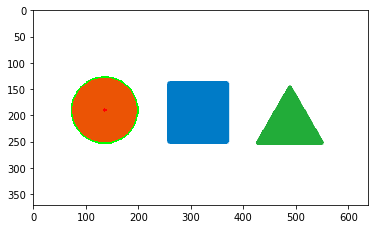

In [112]:
tar = 'datasets/tegaki/test.png'
tegaki = cv2.imread(tar)
tegaki = cv2.medianBlur(tegaki, 9)
tegaki_gray = cv2.cvtColor(tegaki, cv2.COLOR_BGR2GRAY)

height, width, _ = tegaki.shape

min_radius = int(min(height/10, width/10))
max_radius = int(max(height/4, width/4))

circles = cv2.HoughCircles(tegaki_gray,cv2.HOUGH_GRADIENT,1,100,param1=60,param2=30,minRadius=min_radius,maxRadius=max_radius)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(tegaki,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(tegaki,(i[0],i[1]),2,(0,0,255),3)

tegaki = cv2.cvtColor(tegaki, cv2.COLOR_BGR2RGB)
plt.imshow(tegaki)
plt.show()

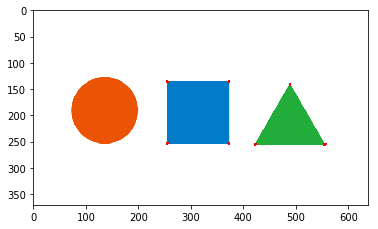

X:255 Y:133
X:256 Y:133
X:257 Y:133
X:371 Y:133
X:372 Y:133
X:373 Y:133
X:374 Y:133
X:254 Y:134
X:255 Y:134
X:256 Y:134
X:257 Y:134
X:371 Y:134
X:372 Y:134
X:373 Y:134
X:374 Y:134
X:375 Y:134
X:253 Y:135
X:254 Y:135
X:255 Y:135
X:256 Y:135
X:257 Y:135
X:258 Y:135
X:371 Y:135
X:372 Y:135
X:373 Y:135
X:374 Y:135
X:375 Y:135
X:253 Y:136
X:254 Y:136
X:255 Y:136
X:256 Y:136
X:257 Y:136
X:258 Y:136
X:371 Y:136
X:372 Y:136
X:373 Y:136
X:374 Y:136
X:375 Y:136
X:253 Y:137
X:254 Y:137
X:255 Y:137
X:256 Y:137
X:257 Y:137
X:258 Y:137
X:371 Y:137
X:372 Y:137
X:373 Y:137
X:374 Y:137
X:375 Y:137
X:253 Y:138
X:254 Y:138
X:255 Y:138
X:256 Y:138
X:257 Y:138
X:258 Y:138
X:371 Y:138
X:372 Y:138
X:373 Y:138
X:374 Y:138
X:487 Y:138
X:488 Y:138
X:489 Y:138
X:490 Y:138
X:491 Y:138
X:487 Y:139
X:488 Y:139
X:489 Y:139
X:490 Y:139
X:491 Y:139
X:487 Y:140
X:488 Y:140
X:489 Y:140
X:490 Y:140
X:491 Y:140
X:487 Y:141
X:488 Y:141
X:489 Y:141
X:490 Y:141
X:491 Y:141
X:487 Y:142
X:488 Y:142
X:489 Y:142
X:490 Y:142
X:49

In [122]:
tar = 'datasets/tegaki/test.png'
tegaki = cv2.imread(tar)
tegaki_gray = cv2.cvtColor(tegaki, cv2.COLOR_BGR2GRAY)


dst = cv2.cornerHarris(tegaki_gray,3,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
tegaki[dst>0.01*dst.max()]=[0,0,255]

coord = np.where(np.all(tegaki == (0, 0, 255), axis=-1))

# BGRからRGBに変換して画像読込み
tegaki = cv2.cvtColor(tegaki, cv2.COLOR_BGR2RGB)

plt.imshow(tegaki)
plt.show()

for i in range(len(coord[0])):
    print("X:%s Y:%s"%(coord[1][i],coord[0][i]))

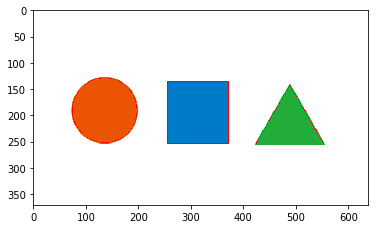

In [334]:
tar = 'datasets/tegaki/test.png'
tegaki = cv2.imread(tar)
tegaki_gray = cv2.cvtColor(tegaki, cv2.COLOR_BGR2GRAY)

tegaki_preprocessed = cv2.GaussianBlur(tegaki_gray, (5, 5), 0)
_, tegaki_binary = cv2.threshold(tegaki_preprocessed, 130, 255, cv2.THRESH_BINARY)
tegaki_binary = cv2.bitwise_not(tegaki_binary)

_, tegaki_contours, _ = cv2.findContours(tegaki_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_im_area = 60
large_contours = [cnt for cnt in tegaki_contours if cv2.contourArea(cnt) > min_im_area]
cv2.drawContours(tegaki, large_contours, -1, (0,0,255))

# BGRからRGBに変換して画像読込み
tegaki = cv2.cvtColor(tegaki, cv2.COLOR_BGR2RGB)

plt.imshow(tegaki)
plt.show()

In [187]:
cv2.matchShapes()

<module 'cv2' from '/Users/yu.nakamura/.virtualenv/aomori_env/lib/python3.6/site-packages/cv2.cpython-36m-darwin.so'>

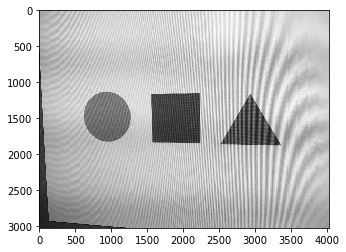

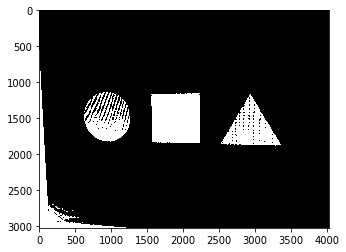

In [217]:
plt.imshow(cv2.GaussianBlur(tegaki_gray, (5, 5), 0))
plt.show()

plt.imshow(tegaki_binary)
plt.show()

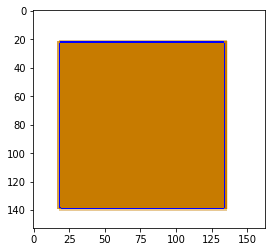

In [289]:
tar = 'datasets/tegaki/rectangle.png'
rectangle = cv2.imread(tar)
rectangle_gray = cv2.cvtColor(rectangle, cv2.COLOR_BGR2GRAY)

rectangle_preprocessed = cv2.GaussianBlur(rectangle_gray, (5, 5), 0)
_, rectangle_binary = cv2.threshold(rectangle_preprocessed, 130, 255, cv2.THRESH_BINARY)
rectangle_binary = cv2.bitwise_not(rectangle_binary)

_, rectangle_contours, _ = cv2.findContours(rectangle_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_im_area = 60
rectangle_contours = [cnt for cnt in rectangle_contours if cv2.contourArea(cnt) > min_im_area]
cv2.drawContours(rectangle, rectangle_contours, -1, (0,0,255))

plt.imshow(rectangle)
plt.show()

In [319]:
for large_contour in large_contours:
    ret = cv2.matchShapes(rectangle_contours[0], large_contour,1,0.0)
    print(ret)

0.11320385442539083
0.0003747777080627124
0.030702148810687557


In [301]:
rectangle_contours[0]

array([[[ 19,  22]],

       [[ 18,  23]],

       [[ 18, 138]],

       [[ 19, 138]],

       [[ 20, 139]],

       [[133, 139]],

       [[134, 138]],

       [[134,  23]],

       [[133,  22]]], dtype=int32)

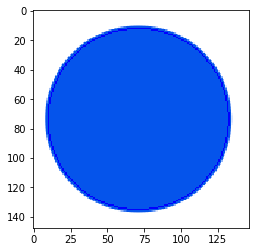

In [302]:
tar = 'datasets/tegaki/circle.png'
circle = cv2.imread(tar)
circle_gray = cv2.cvtColor(circle, cv2.COLOR_BGR2GRAY)

circle_preprocessed = cv2.GaussianBlur(circle_gray, (5, 5), 0)
_, circle_binary = cv2.threshold(circle_preprocessed, 130, 255, cv2.THRESH_BINARY)
circle_binary = cv2.bitwise_not(circle_binary)

_, circle_contours, _ = cv2.findContours(circle_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_im_area = 60
circle_contours = [cnt for cnt in circle_contours if cv2.contourArea(cnt) > min_im_area]
cv2.drawContours(circle, circle_contours, -1, (0,0,255))

plt.imshow(circle)
plt.show()

In [318]:
for large_contour in large_contours:
    ret = cv2.matchShapes(circle_contours[0], large_contour,1,0.0)
    print(ret)

0.14529575774457437
0.03246668102724626
0.0013897545084959884


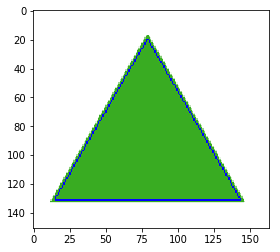

In [313]:
tar = 'datasets/tegaki/triangle.png'
triangle = cv2.imread(tar)
triangle_gray = cv2.cvtColor(triangle, cv2.COLOR_BGR2GRAY)

triangle_preprocessed = cv2.GaussianBlur(triangle_gray, (5, 5), 0)
_, triangle_binary = cv2.threshold(triangle_preprocessed, 130, 255, cv2.THRESH_BINARY)
triangle_binary = cv2.bitwise_not(triangle_binary)

_, triangle_contours, _ = cv2.findContours(triangle_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_im_area = 60
triangle_contours = [cnt for cnt in triangle_contours if cv2.contourArea(cnt) > min_im_area]
cv2.drawContours(triangle, triangle_contours, -1, (0,0,255))

plt.imshow(triangle)
plt.show()

In [317]:
for large_contour in large_contours:
    ret = cv2.matchShapes(triangle_contours[0], large_contour,1,0.0)
    print(ret)

0.001577377432550875
0.11159398564557566
0.14267091216432592


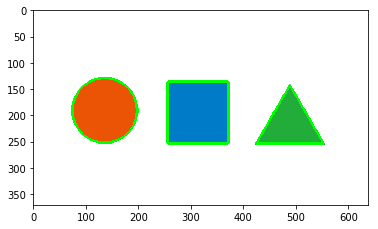

In [312]:
tegaki = cv2.drawContours(tegaki, [large_contours[2]], 0, (0,255,0), 3)

plt.imshow(tegaki)
plt.show()

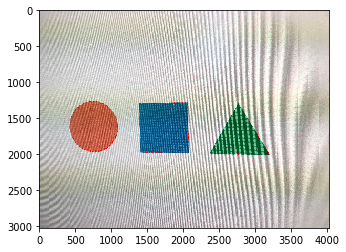

In [316]:
tar = 'datasets/tegaki/photo2.jpg'
tegaki = cv2.imread(tar)
tegaki_gray = cv2.cvtColor(tegaki, cv2.COLOR_BGR2GRAY)

tegaki_preprocessed = cv2.GaussianBlur(tegaki_gray, (5, 5), 0)
_, tegaki_binary = cv2.threshold(tegaki_preprocessed, 130, 255, cv2.THRESH_BINARY)
tegaki_binary = cv2.bitwise_not(tegaki_binary)

_, tegaki_contours, _ = cv2.findContours(tegaki_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_im_area = 60
large_contours = [cnt for cnt in tegaki_contours if cv2.contourArea(cnt) > min_im_area]
cv2.drawContours(tegaki, large_contours, -1, (0,0,255))

# BGRからRGBに変換して画像読込み
tegaki = cv2.cvtColor(tegaki, cv2.COLOR_BGR2RGB)

plt.imshow(tegaki)
plt.show()

In [320]:
for large_contour in large_contours:
    ret = cv2.matchShapes(rectangle_contours[0], large_contour,1,0.0)
    print(ret)

0.11320385442539083
0.0003747777080627124
0.030702148810687557


In [345]:
height, width, _ = tegaki.shape

upper_left = (height, width)
bottom_right = (0, 0)
for i in large_contours[0]:
    upper_left = (min(upper_left[0], i[0][0]), min(upper_left[1], i[0][1]))
    bottom_right = (max(bottom_right[0], i[0][0]), max(bottom_right[1], i[0][1]))
    
triangle_x = int((bottom_right[0] + upper_left[0]) / 2)
triangle_y = int((bottom_right[1] + upper_left[1]) / 2)

cv2.circle(tegaki, (triangle_x, triangle_y), 10, (255, 0, 0), 10)
print(triangle_x, triangle_y)

462 198


In [353]:
height, width, _ = tegaki.shape

upper_left = (height, width)
bottom_right = (0, 0)
for i in large_contours[0]:
    upper_left = (min(upper_left[0], i[0][0]), min(upper_left[1], i[0][1]))
    bottom_right = (max(bottom_right[0], i[0][0]), max(bottom_right[1], i[0][1]))


M = cv2.moments(large_contours[0])
center_x = int(M['m10']/M['m00'])
center_y = int(M['m01']/M['m00'])

cv2.circle(tegaki, (center_x, center_y), 10, (255, 0, 0), 10)
print(center_x, center_y)

488 216


In [343]:
height, width, _ = tegaki.shape

upper_left = (height, width)
bottom_right = (0, 0)
for i in large_contours[1]:
    upper_left = (min(upper_left[0], i[0][0]), min(upper_left[1], i[0][1]))
    bottom_right = (max(bottom_right[0], i[0][0]), max(bottom_right[1], i[0][1]))
    
rectangle_x = int((bottom_right[0] + upper_left[0]) / 2)
rectangle_y = int((bottom_right[1] + upper_left[1]) / 2)

cv2.circle(tegaki, (rectangle_x, rectangle_y), 10, (0, 0, 255), 10)
print(rectangle_x, rectangle_y)

314 194


In [344]:
height, width, _ = tegaki.shape

upper_left = (height, width)
bottom_right = (0, 0)
for i in large_contours[2]:
    upper_left = (min(upper_left[0], i[0][0]), min(upper_left[1], i[0][1]))
    bottom_right = (max(bottom_right[0], i[0][0]), max(bottom_right[1], i[0][1]))
    
circle_x = int((bottom_right[0] + upper_left[0]) / 2)
circle_y = int((bottom_right[1] + upper_left[1]) / 2)

cv2.circle(tegaki, (circle_x, circle_y), 10, (0, 255, 0), 10)
print(circle_x, circle_y)

136 190


In [366]:
hsv = cv2.cvtColor(tegaki, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

hsv[rectangle_x, rectangle_y]

array([  0,   0, 255], dtype=uint8)

In [381]:
hsv[rectangle_y, rectangle_x]

array([101, 255, 199], dtype=uint8)

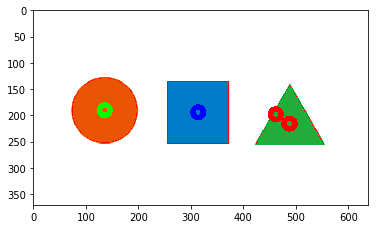

In [354]:
plt.imshow(tegaki)
plt.show()

## 次にやること
- 画像認識
    - circleとtriangleの輪郭データの取得
    - 3つの図形の比較処理の実装
    - 3つの図形、色の印刷
    - 色の抽出

```
○, ● 10
□, ■ 条件文
△〜△ for文
▲〜▲〜▲ if文

○●○●

○●△□○○△

△▲□○▲●▲△
```